# 1D Burgers' Equation (Nonlinear Advection-Diffusion)

Goal: Solve the 1D Burgers’ equation using finite difference methods and visualize shock formation.

---

## Governing Equation

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}, \quad x \in [0, L], \ t>0
$$

- $u(x,t)$ = velocity
- $\nu$ = viscosity (controls diffusion)
- Left-hand term = nonlinear advection, right-hand term = diffusion

---

## Boundary and Initial Conditions

- Domain: $0 \le x \le L$
- Dirichlet boundary: $u(0,t) = u(L,t) = 0$
- Initial condition: Gaussian or sine profile
$$
u(x,0) = -\sin(\pi x)
$$

---

## Numerical Approach

- Explicit Forward Time, Central Space (FTCS) for diffusion
- Upwind for nonlinear advection (stability)
- Time-step chosen according to CFL condition
$$
dt \le \min\left(\frac{dx}{\max(u)}, \frac{dx^2}{2\nu}\right)
$$

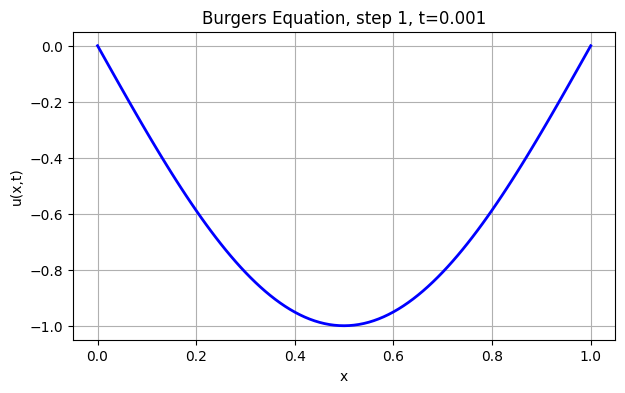

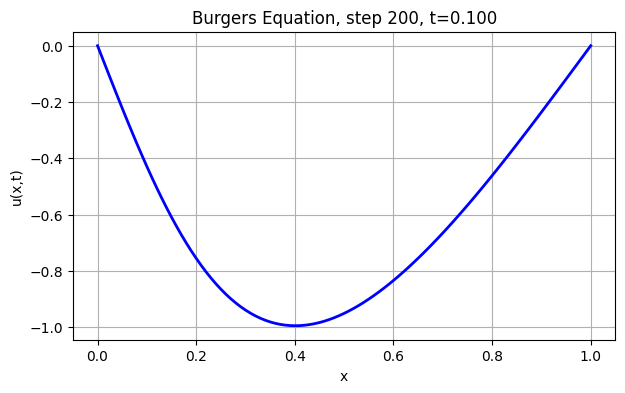

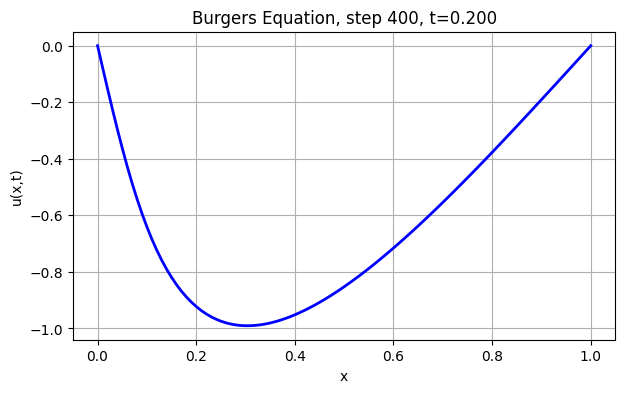

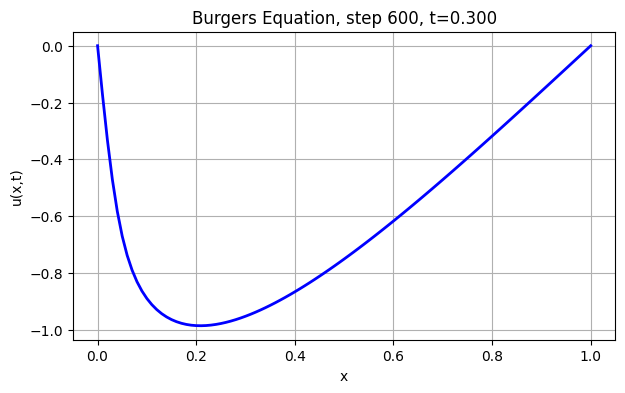

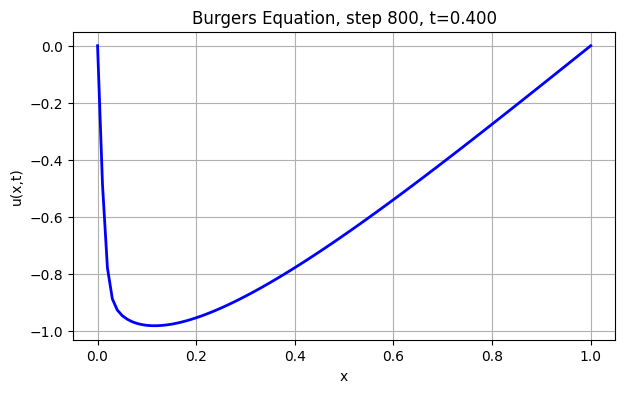

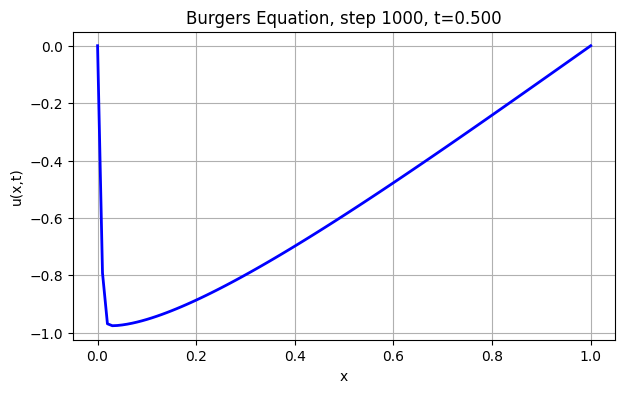

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Parameters
# ---------------------------
L = 1.0
Nx = 101
dx = L / (Nx - 1)
x = np.linspace(0, L, Nx)
nu = 0.01        # viscosity
dt = 0.0005      # time step (adjust for stability)
Nt = 1000        # number of time steps
plot_every = 200

# ---------------------------
# Initial condition
# ---------------------------
u = -np.sin(np.pi * x)
u_new = u.copy()

# ---------------------------
# Time-stepping loop
# ---------------------------
for n in range(1, Nt+1):
    u_new[1:-1] = u[1:-1] - dt * u[1:-1] * (u[1:-1] - u[0:-2]) / dx \
                   + nu * dt * (u[2:] - 2*u[1:-1] + u[0:-2]) / dx**2
    # Enforce Dirichlet BC
    u_new[0] = 0.0
    u_new[-1] = 0.0
    
    u[:] = u_new[:]
    
    # Plot intermediate results
    if n % plot_every == 0 or n == 1:
        plt.figure(figsize=(7,4))
        plt.plot(x, u, 'b-', lw=2)
        plt.xlabel('x')
        plt.ylabel('u(x,t)')
        plt.title(f'Burgers Equation, step {n}, t={n*dt:.3f}')
        plt.grid(True)
        plt.show()

## Observations

- For small viscosity, nonlinear advection dominates → steep gradients or “shocks” form.
- Diffusion term smooths out steep gradients; higher ν → smoother profile.
- Upwind + explicit diffusion scheme is simple and educational, but higher-order schemes are preferred for research.

---

## Next Steps / Extensions

- Compare different initial conditions (Gaussian pulse, square wave).
- Implement Lax–Friedrichs or MacCormack schemes for better shock resolution.
- Extend to 2D Burgers’ equation as a stepping stone to 2D Navier–Stokes.